# Enoncé

</u> Consignes </u>: Complétez ce notebook pour répondre aux questions.

**2 points seront consacrés à la clarté** du code et de vos commentaires, ainsi qu'à l'esthétique du rapport final.
On vous invite à créer des cellules de type "Markdown" supplémentaires ou des commentaires pour expliquer votre raisonnement, notamment dans l'étude autonome.

Merci d'indiquer au mieux la ou les questions que chaque cellule traite.

Des graphiques peu lisibles ou sans légendes n'auront pas tous les points

Ce partiel est un travail de groupe à réaliser à 2. Il est attendu que les travaux de deux groupes différents soient clairement différents.

Toutes les questions et l'analyse en autonomie peuvent être travaillées avec les fonctions et méthodes vues en cours. Néanmoins, vous pouvez vous aider des documentations des librairies vues en cours ainsi que des sites classiques de questions/réponses de programmation (eg: Quora, Stackoverflow) pour vous débloquer sur un point particulier.
Pour la partie visualisation, sauf besoin très spécifique, nous vous demanderons d'utiliser uniquement la librairie matplotlib vue en cours.


#### MERCI DE VERIFIER QUE VOTRE CODE FONCTIONNE EN EXECUTANT LES CELLULES DE MANIERE SEQUENTIELLE (DE LA PREMIERE A LA DERNIERE).
Des cellules ne s'executant pas ne rapporteront pas tous les points.


# Exercice guidé (6pts)

1) Chargez la base de données unicorns.csv, base de donnée recensant les licornes mondiales à date de mars 2022. Proposez une analyse rapide de la base en utilisant les éléments vus en cours.

2) Affichez avec le graphique de votre choix la valuation des 12 plus grosses licornes Françaises

3) Faites un pie chart pour représenter la répartition des secteurs au sein des licornes

4) Ecrivez une fonction qui prend en entrée un pays et affiche:
- Si elle a plus que 4 licornes compris: "Le pays X a X licornes pour une valorisation totale de X $B"
- Si elle a entre 1 et 3 licornes, donner les détails: "Le pays X n'a que X licornes: ?, ? et ?"
- Si elle n'en a aucune: "Le pays X n'a aucune licorne"

5) Ecrivez une fonction qui prend en entrée un secteur d'activité et qui renvoie le pays avec le plus de licornes

6) Trouvez le pays avec la plus haute valuation moyenne de ses licornes

In [6]:
#1)
#Chargement du fichier CSV
import pandas as pd

df_unicorns = pd.read_csv("unicorns.csv")

In [7]:
#Afficher les premières lignes du DataFrame
display(df_unicorns.head())

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,125.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."


In [8]:
#Apprenons à connaître nos données et vérifions les valeurs de notre DataFrame
display(df_unicorns.describe())
display(df_unicorns.info())

,Valuation ($B)
count,1136.000000
mean,3.309692
std,7.819553
min,1.000000
25%,1.100000
50%,1.600000
75%,3.000000
max,140.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1136 non-null   object 
 1   Valuation ($B)    1136 non-null   float64
 2   Date Joined       1136 non-null   object 
 3   Country           1136 non-null   object 
 4   City              1136 non-null   object 
 5   Industry          1136 non-null   object 
 6   Select Investors  1136 non-null   object 
dtypes: float64(1), object(6)
memory usage: 62.2+ KB


None

In [9]:
display(df_unicorns.shape)
display(df_unicorns.columns)

(1136, 7)

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Investors'],
      dtype='object')

**Première analyse :**

- Notre DataSet ne contient pas de valeurs nulles
- Les données sont propres

In [10]:
#2) Affichez avec le graphique de votre choix la valuation des 12 plus grosses licornes Françaises
max_france = df_unicorns[df_unicorns["Country"]=="France"]
max_france_12 = max_france.sort_values("Valuation ($B)", ascending=False).head(12)

display(max_france_12)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
102,Doctolib,6.40,2019-03-19,France,Paris,Health,"BPI France, Kerala Ventures, Accel"
120,Back Market,5.70,2021-05-18,France,Paris,E-commerce & direct-to-consumer,"Aglae Ventures, Eurazeo, Daphni"
145,Qonto,5.00,2022-01-11,France,Paris,Fintech,"Alven Capital, Valar Ventures, Tencent Holdings"
175,Sorare,4.30,2021-09-21,France,Paris,E-commerce & direct-to-consumer,"Benchmark, Accel, SoftBank Group"
237,Mirakl,3.50,2020-09-22,France,Paris,E-commerce & direct-to-consumer,"Elaia Partners, 83North, Felix Capital"
317,Alan,2.85,2021-04-19,France,Paris,Fintech,"Index Ventures, Temasek, Portag3 Ventures"
319,ContentSquare,2.80,2021-05-25,France,Paris,Internet software & services,"Highland Europe, Eurazeo, Canaan Partners"
332,ManoMano,2.60,2021-07-05,France,Paris,E-commerce & direct-to-consumer,"General Atlantic, Piton Capital, Partech Partners"
383,Voodoo,2.31,2020-08-17,France,Paris,Other,"Tencent Holdings, Goldman Sachs"
426,BlaBlaCar,2.00,2015-09-16,France,Paris,Auto & transportation,"Accel Partners, Index Ventures, Insight Ventur..."


In [11]:
#3) Faites un pie chart pour représenter la répartition des secteurs au sein des licornes
display(df_unicorns['Industry'].unique())

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence', 'Internet Software Services'],
      dtype=object)

**Cette démarche nous a permis de voir que la mention Artificial intelligence apparaît deux fois !**

Nous allons uniformiser la mention Artificial intelligence.

D'abord, nous allons créer notre pie chart pour bien le mettre en forme et que tous les textes soient lisibles.



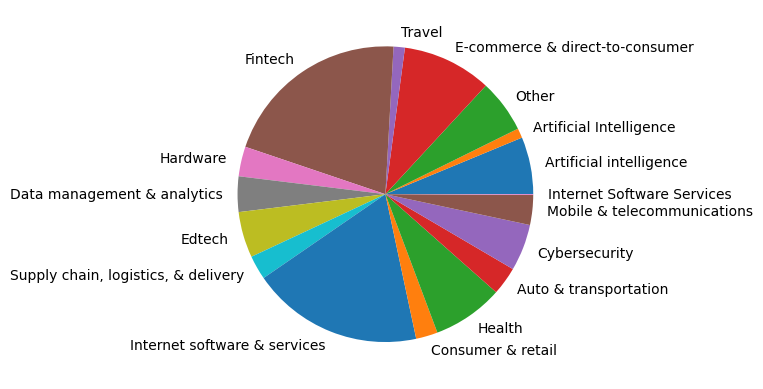

In [12]:
import matplotlib.pyplot as plt

names = ['Artificial intelligence',
       'Artificial Intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Travel', 'Fintech', 'Hardware','Data management & analytics', 'Edtech', 'Supply chain, logistics, & delivery','Internet software & services',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Internet Software Services']
sizes = [df_unicorns.value_counts(subset='Industry')['Artificial intelligence'],df_unicorns.value_counts(subset='Industry')['Artificial Intelligence'],df_unicorns.value_counts(subset='Industry')['Other'], df_unicorns.value_counts(subset='Industry')['E-commerce & direct-to-consumer'],df_unicorns.value_counts(subset='Industry')['Travel'],df_unicorns.value_counts(subset='Industry')['Fintech'],df_unicorns.value_counts(subset='Industry')['Hardware'],df_unicorns.value_counts(subset='Industry')['Data management & analytics'],df_unicorns.value_counts(subset='Industry')['Supply chain, logistics, & delivery'],df_unicorns.value_counts(subset='Industry')['Edtech'],df_unicorns.value_counts(subset='Industry')['Internet software & services'],df_unicorns.value_counts(subset='Industry')['Consumer & retail'],df_unicorns.value_counts(subset='Industry')['Health'],df_unicorns.value_counts(subset='Industry')['Auto & transportation'],df_unicorns.value_counts(subset='Industry')['Cybersecurity'],df_unicorns.value_counts(subset='Industry')['Mobile & telecommunications'],df_unicorns.value_counts(subset='Industry')['Internet Software Services']]

plt.pie(sizes, labels=names)
plt.show()

In [13]:
#Corrigeons la valeur Artificial intelligence
df_unicorns['Industry'] = df_unicorns['Industry'].str.replace('Artificial Intelligence', 'Artificial intelligence', case=False)
display(df_unicorns['Industry'].unique())

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Internet Software Services'], dtype=object)

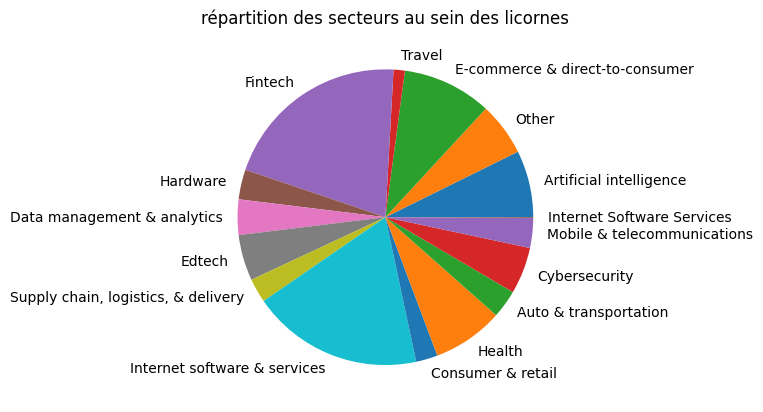

In [62]:
#Reproduisons le graph avec les valeurs à jour
names = ['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Travel', 'Fintech', 'Hardware','Data management & analytics', 'Edtech', 'Supply chain, logistics, & delivery','Internet software & services',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Internet Software Services']
sizes = [df_unicorns.value_counts(subset='Industry')['Artificial intelligence'],df_unicorns.value_counts(subset='Industry')['Other'], df_unicorns.value_counts(subset='Industry')['E-commerce & direct-to-consumer'],df_unicorns.value_counts(subset='Industry')['Travel'],df_unicorns.value_counts(subset='Industry')['Fintech'],df_unicorns.value_counts(subset='Industry')['Hardware'],df_unicorns.value_counts(subset='Industry')['Data management & analytics'],df_unicorns.value_counts(subset='Industry')['Supply chain, logistics, & delivery'],df_unicorns.value_counts(subset='Industry')['Edtech'],df_unicorns.value_counts(subset='Industry')['Internet software & services'],df_unicorns.value_counts(subset='Industry')['Consumer & retail'],df_unicorns.value_counts(subset='Industry')['Health'],df_unicorns.value_counts(subset='Industry')['Auto & transportation'],df_unicorns.value_counts(subset='Industry')['Cybersecurity'],df_unicorns.value_counts(subset='Industry')['Mobile & telecommunications'],df_unicorns.value_counts(subset='Industry')['Internet Software Services']]

plt.pie(sizes, labels=names)
plt.title("répartition des secteurs au sein des licornes")
plt.show()

In [32]:
#4) Ecrivez une fonction qui prend en entrée un pays et affiche:
#Si elle a plus que 4 licornes compris: "Le pays X a X licornes pour une valorisation totale de X $B"
#Si elle a entre 1 et 3 licornes, donner les détails: "Le pays X n'a que X licornes: ?, ? et ?"
#Si elle n'en a aucune: "Le pays X n'a aucune licorne"

def compteur_licornes(pays):
  #Nous allons définir une variable pour bien filtrer sur le pays de notre paramètre
  filtre_pays = df_unicorns[df_unicorns['Country'] == pays]

  #Nous allons compter le nombre de pays dans notre sélection
  total_licornes = len(filtre_pays)

  #Nous allons sommer dès maintenant la valorisation
  total_valorisation = filtre_pays['Valuation ($B)'].sum()

  #Maintenant nous pouvons préparer nos sorties en fonction du nombre de licornes
  if total_licornes > 4:
    print("Le pays", pays, "a", total_licornes, "licornes pour une valorisation totale de", total_valorisation, "$B")

  elif total_licornes >= 1:
  #Nous devons créer une nouvelle variable permettant de citer le nom des licornes qu'il y en ait 1, 2 ou 3
    licornes = ', '.join(filtre_pays['Company'])
    print("Le pays", pays, "n'a que", total_licornes, "licorne(s) :", licornes)

  else:
    print("Le pays", pays, "n'a aucune licorne")

compteur_licornes("China")
compteur_licornes("Croatia")
compteur_licornes("Malaysia")

Le pays China a 173 licornes pour une valorisation totale de 675.56 $B
Le pays Croatia n'a que 2 licorne(s) : Rimac Automobili, Infobip
Le pays Malaysia n'a que 1 licorne(s) : Carsome


In [19]:
display(df_unicorns['Country'].unique())

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'India', 'Indonesia', 'Turkey', 'Germany', 'Hong Kong',
       'Seychelles', 'Mexico', 'Estonia', 'Canada', 'South Korea',
       'Netherlands', 'France', 'Israel', 'Finland', 'Colombia',
       'Belgium', 'Brazil', 'Denmark', 'Switzerland', 'Lithuania',
       'Austria', 'Ireland', 'Vietnam', 'United Arab Emirates',
       'Argentina', 'Spain', 'Japan', 'Luxembourg', 'Nigeria',
       'Philippines', 'Croatia', 'Senegal', 'Malaysia', 'Bermuda',
       'Norway', 'South Africa', 'Ecuador', 'Chile', 'Thailand',
       'Czech Republic', 'Italy'], dtype=object)

In [52]:
#5) Ecrivez une fonction qui prend en entrée un secteur d'activité et qui renvoie le pays avec le plus de licornes

def max_licornes(secteur):
  #Nous allons d'abord nous assurer que l'user renseigne un paramètre présent dans le champ Industry
  secteurs_valides = ['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Internet Software Services']

  if secteur not in secteurs_valides:
        print("Le secteur n'est pas valide. Veuillez renseigner l'un des secteurs suivants:", ', '.join(secteurs_valides))
        return None

  #Maintenant, filtrons sur le secteur renseigné
  licornes_secteur = df_unicorns[df_unicorns['Industry'] == secteur]

  #Pour être sûr de sélectionner le bon pays, nous retournons avec l'index du pays qui a la valeur la plus élevée
  pays_max_licornes = licornes_secteur['Country'].value_counts().idxmax()
  max_licornes = licornes_secteur['Country'].value_counts().max()

  print("Le pays", pays_max_licornes, "a le plus de licornes dans le secteur", secteur, "avec" , max_licornes, "licornes")

max_licornes('Edtech')
max_licornes('Hardware')
max_licornes('Data management and analytics')
max_licornes('Data management & analytics')

Le pays China a le plus de licornes dans le secteur Edtech avec 12 licornes
Le pays China a le plus de licornes dans le secteur Hardware avec 18 licornes
Le secteur n'est pas valide. Veuillez renseigner l'un des secteurs suivants: Artificial intelligence, Other, E-commerce & direct-to-consumer, Fintech, Internet software & services, Supply chain, logistics, & delivery, Data management & analytics, Edtech, Hardware, Consumer & retail, Health, Auto & transportation, Cybersecurity, Mobile & telecommunications, Travel, Internet Software Services
Le pays United States a le plus de licornes dans le secteur Data management & analytics avec 34 licornes


In [58]:
#6) Trouvez le pays avec la plus haute valuation moyenne de ses licornes

moyenne_valuation = df_unicorns['Valuation ($B)'].mean()
print(moyenne_valuation)


moyenne_valuation_pays = df_unicorns.groupby('Country')['Valuation ($B)'].mean().sort_values(ascending=False)
print(moyenne_valuation_pays)

3.3096919014084505
Country
Seychelles              10.000000
Sweden                   7.815000
Australia                6.800000
Turkey                   5.256667
Estonia                  4.950000
Indonesia                4.666667
United Kingdom           4.437500
China                    3.904971
Hong Kong                3.837500
Austria                  3.805000
Denmark                  3.350000
United States            3.296937
Netherlands              3.208571
Finland                  3.115000
Lithuania                3.065000
Belgium                  2.983333
India                    2.941212
Vietnam                  2.635000
Germany                  2.592414
Canada                   2.591053
Mexico                   2.500000
Colombia                 2.466667
Argentina                2.450000
France                   2.375652
Brazil                   2.357647
South Korea              2.199231
Israel                   2.123636
Nigeria                  2.000000
Luxembourg           

In [61]:
print("Le pays avec la plus haute valuation moyenne de ses licornes est :",moyenne_valuation_pays.head(1))

Le pays avec la plus haute valuation moyenne de ses licornes est : Country
Seychelles    10.0
Name: Valuation ($B), dtype: float64


# Exercice en autonomie (12pts)

Nous vous proposons une étude de données libres, portant sur le nombre de lieux de tournages de films/séries... demandés à la mairie de Paris entre 2016 et 2022.

Le but de l'exercice est de <b>mobiliser vos connaissances techniques pour répondre à une question que vous devez vous-mêmes formuler.</b>

Nous vous prions d'indiquer clairement dans la première cellule ci dessous la problématique sur laquelle vous souhaitez travailler.

L'évaluation se portera sur 3 axes:

- 1) Originalité/Difficulté de la problématique choisie. (2 points)


- 2) Qualité et pertinence des analyses, c'est à dire est-ce que les graphes/analyses que vous faites sont pertinents pour répondre à la question que vous vous posez. Nous nous attendons à ce que l'étude suive une trame cohérente et se termine par une conclusion logique sur votre problématique. (5 points)


- 3) Qualité, complexité technique et variété des graphes et analyses proposés, en mobilisant les connaissances vues en cours. (5 points)



## Merci d'indiquer ci dessous en une phrase la problématique que vous souhaitez traiter:

Analyse des tendances temporelles et spatiales des lieux de tournages de films/séries à Paris entre 2016 et 2022


In [65]:
df_tournage = pd.read_excel('lieux-de-tournage-a-paris.xlsx')

#Afficher les premières lignes du DataFrame
display(df_tournage.head())

,Identifiant du lieu,Année du tournage,Type de tournage,Titre,Réalisateur,Producteur,Localisation de la scène,Code postal,Date de début,Date de fin,Coordonnée en X,Coordonnée en Y,geo_shape,geo_point_2d
0,2018-1293,2018,Long métrage,La Verité,Hirokazu Kore-Eda,3B Production,"100 rue mouffetard, 75005 paris",75005.0,2018-11-09,2018-11-10,2.349555,48.841300,"{""coordinates"":[2.3495550599403665,48.84129975...","48.84129975185761, 2.3495550599403665"
1,2019-1524,2019,Long métrage,LES DEUX ALFRED,Bruno Podalydès,WHY NOT PRODUCTIONS,"avenue de choisy, 75013 paris",75013.0,2019-11-01,2019-11-01,2.358395,48.828112,"{""coordinates"":[2.3583953009465852,48.82811150...","48.828111508466826, 2.3583953009465852"
2,2019-1529,2019,Série TV,MODERN FAMILY - Saison 11 - FINALE,Jim Bagdonas,FROGGIE PRODUCTION,"21 avenue kléber, 75116 paris",75116.0,2019-11-13,2019-11-13,2.292820,48.870326,"{""coordinates"":[2.2928203533822575,48.87032577...","48.87032577631454, 2.2928203533822575"
3,2018-895,2018,Série TV,THE THUNDER,NaN,Europe Film and TV Co Production,"63 boulevard des batignolles, 75008 paris",75008.0,2018-08-01,2018-08-03,2.317331,48.881265,"{""coordinates"":[2.3173309801299937,48.88126465...","48.8812646523452, 2.3173309801299937"
4,2018-902,2018,Série TV,Osmosis,Julis Berge - Philippe Larue,CAPA SERIES,"rue bonaparte, 75006 paris",75006.0,2018-07-31,2018-07-31,2.332698,48.850272,"{""coordinates"":[2.3326985029738543,48.85027178...","48.85027178321409, 2.3326985029738543"


In [66]:
#Apprenons à connaître nos données et vérifions les valeurs de notre DataFrame
display(df_tournage.describe())
display(df_tournage.info())

,Année du tournage,Code postal,Coordonnée en X,Coordonnée en Y
count,12265.000000,12264.000000,12265.000000,1.226500e+04
mean,2018.700204,75037.069635,79643.918429,8.387764e+05
std,2.087546,646.113640,213445.962832,2.247838e+06
min,2016.000000,75001.000000,2.229019,4.876419e+01
25%,2017.000000,75007.000000,2.330316,4.885312e+01
50%,2019.000000,75011.000000,2.349355,4.886647e+01
75%,2021.000000,75017.000000,2.380169,4.888235e+01
max,2022.000000,94320.000000,660955.660000,6.867668e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12265 entries, 0 to 12264
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Identifiant du lieu       12265 non-null  object 
 1   Année du tournage         12265 non-null  int64  
 2   Type de tournage          12265 non-null  object 
 3   Titre                     12265 non-null  object 
 4   Réalisateur               11913 non-null  object 
 5   Producteur                12234 non-null  object 
 6   Localisation de la scène  12265 non-null  object 
 7   Code postal               12264 non-null  float64
 8   Date de début             12265 non-null  object 
 9   Date de fin               12265 non-null  object 
 10  Coordonnée en X           12265 non-null  float64
 11  Coordonnée en Y           12265 non-null  float64
 12  geo_shape                 12265 non-null  object 
 13  geo_point_2d              12265 non-null  object 
dtypes: flo

None

Nous remarquons qu'il nous manque certaines données : champ Réalisateur, champ Producteur, champ Code Postal

In [67]:
display(df_tournage.shape)
display(df_tournage.columns)

(12265, 14)

Index(['Identifiant du lieu', 'Année du tournage', 'Type de tournage', 'Titre',
       'Réalisateur', 'Producteur', 'Localisation de la scène', 'Code postal',
       'Date de début', 'Date de fin', 'Coordonnée en X', 'Coordonnée en Y',
       'geo_shape', 'geo_point_2d'],
      dtype='object')

## **Analyse temporelle**

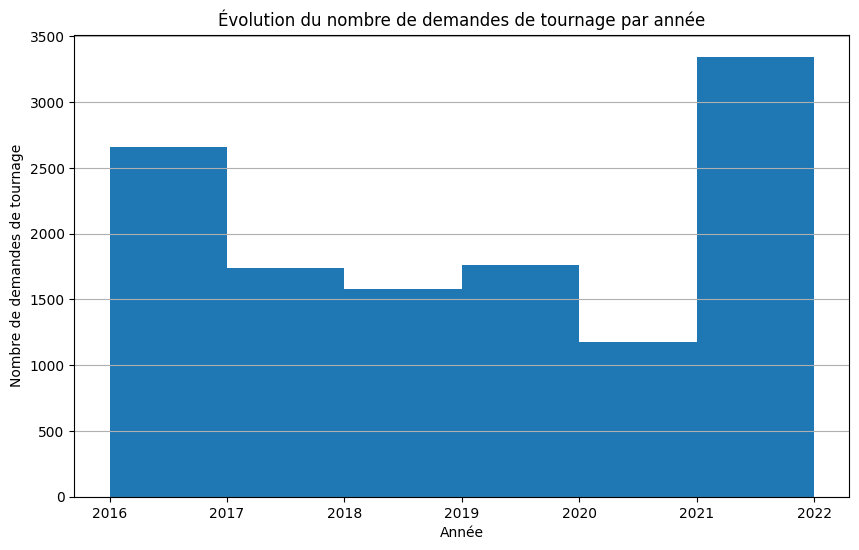

In [76]:
#Représentons l'évolution du nombre de demandes de tournage
plt.figure(figsize=(10, 6))
plt.hist(df_tournage['Année du tournage'], bins=range(df_tournage['Année du tournage'].min(), df_tournage['Année du tournage'].max()+1))
plt.title('Évolution du nombre de demandes de tournage par année')
plt.xlabel('Année')
plt.ylabel('Nombre de demandes de tournage')
plt.grid(axis='y')
plt.show()

#Identifier les années avec une forte augmentation ou diminution des demandes

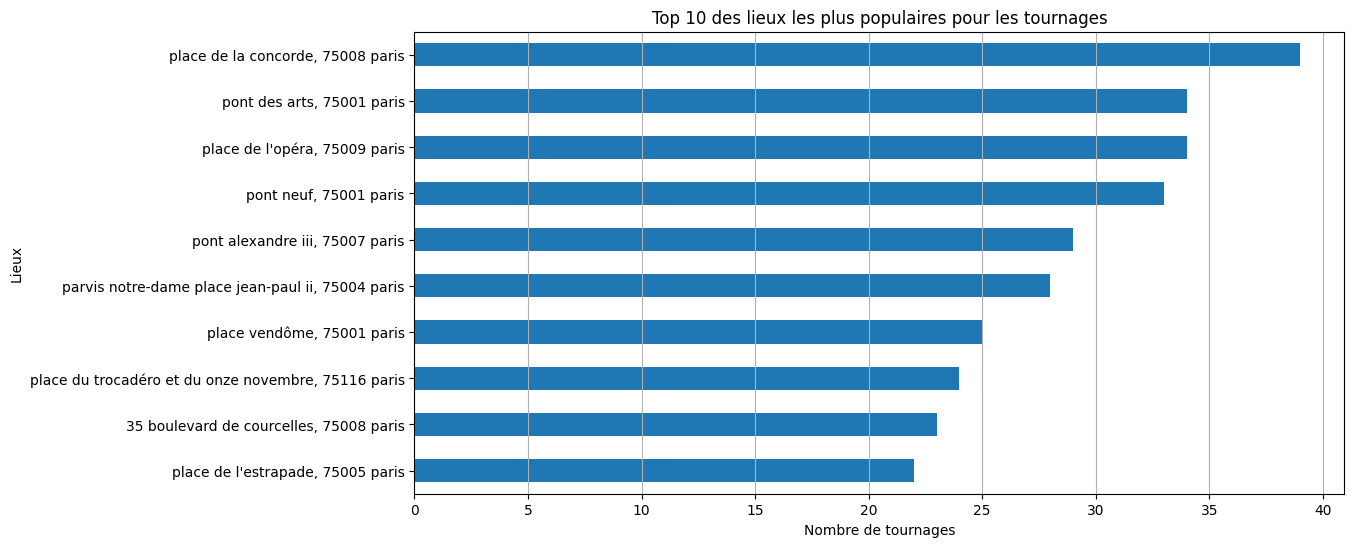

In [96]:
tournages_par_quartier = df_tournage['Localisation de la scène'].value_counts()
top_quartiers = tournages_par_quartier.head(10)

plt.figure(figsize=(12, 6))
top_quartiers.sort_values().plot(kind='barh')
plt.title('Top 10 des lieux les plus populaires pour les tournages')
plt.xlabel('Nombre de tournages')
plt.ylabel('Lieux')
plt.grid(axis='x')
plt.show()

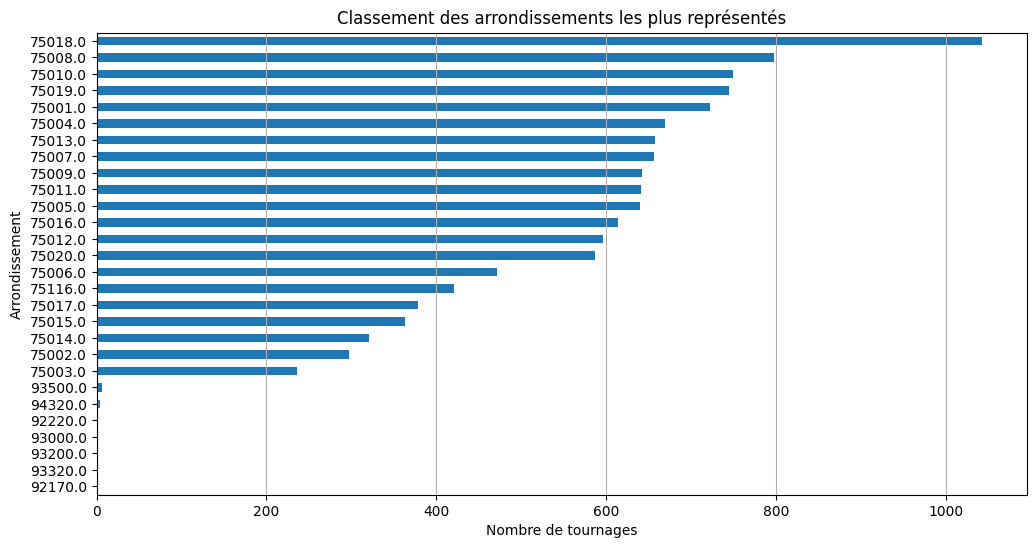

In [95]:
#Quels sont les arrondissements les plus représentés ?

tournages_par_arrondissement = df_tournage['Code postal'].value_counts()

plt.figure(figsize=(12, 6))
tournages_par_arrondissement.sort_values().plot(kind='barh')
plt.title('Classement des arrondissements les plus représentés')
plt.xlabel('Nombre de tournages')
plt.ylabel('Arrondissement')
plt.grid(axis='x')
plt.show()